In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.drop('Address',axis=1,inplace=True)

<AxesSubplot:>

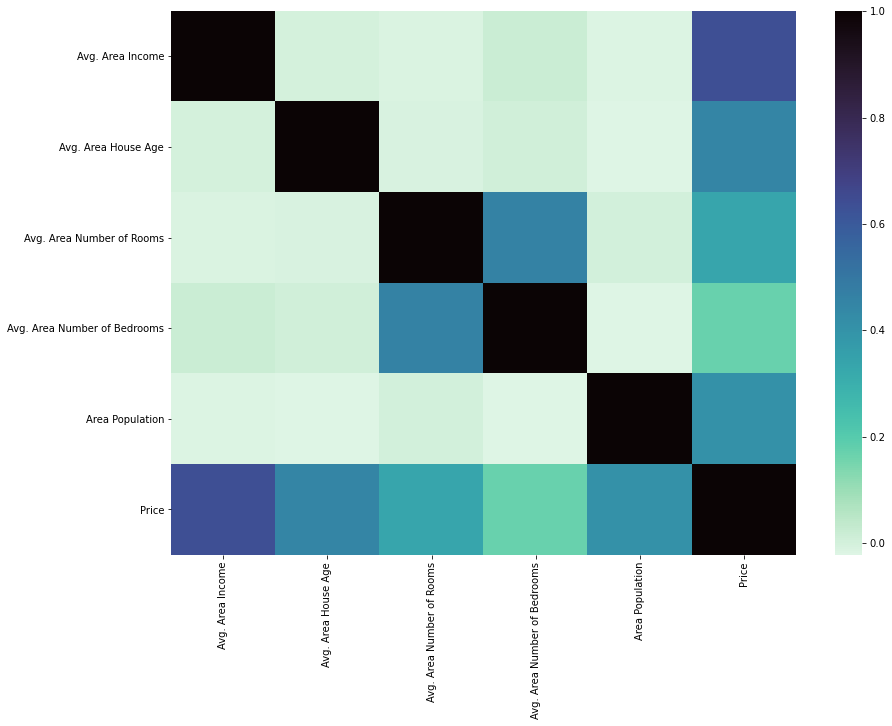

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='mako_r')

In [8]:
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,-1].values.reshape(-1,1)

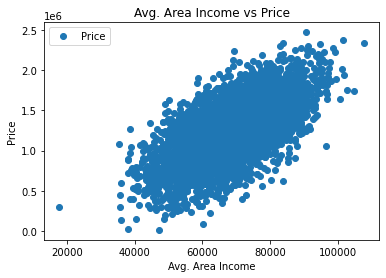

In [9]:
df.plot(x='Avg. Area Income', y='Price', style='o')  
plt.title('Avg. Area Income vs Price')  
plt.xlabel('Avg. Area Income')  
plt.ylabel('Price')  
plt.show()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
regressor=LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
regressor.intercept_

array([-224617.80109278])

In [14]:
regressor.coef_

array([[21.24368249]])

In [15]:
y_pred = regressor.predict(X_test) 

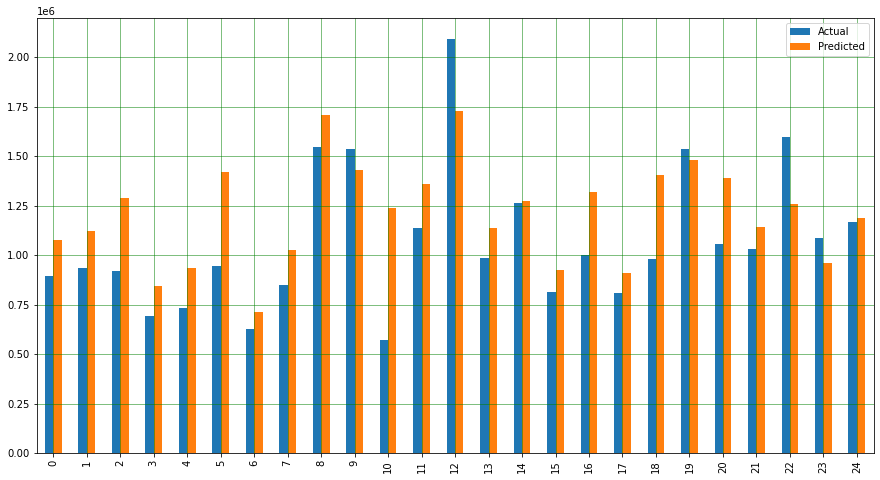

In [16]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfsmp = data.head(25)
dfsmp.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:', R2)

R^2: 0.40060598064566877


In [18]:
target=df.iloc[:,-1].values.reshape(-1,1)

for i in range(5):
    input=df.iloc[:,i].values.reshape(-1,1)
    xtr,xts,ytr,yts=train_test_split(input,target,test_size=0.2,random_state=0)
    regressor=LinearRegression()
    regressor.fit(xtr,ytr)
    yPred = regressor.predict(xts)
    rsquared = metrics.r2_score(yts, yPred)
    print('R^2:' , rsquared)

R^2: 0.40060598064566877
R^2: 0.20108184216250102
R^2: 0.1371646907297981
R^2: 0.032386406247409294
R^2: 0.17500136139668954


In [19]:
n = X_test.shape[0]
p = X_test.shape[1]

In [20]:
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))

Adjusted R^2 : 0.4000053854358949


In [21]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 219728.33602368194


In [22]:
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 74084394125.46416


In [23]:
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 272184.4854606231
